<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/ML_%EA%B5%B0%EC%A7%91_0801.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 군집
* 각 군집화 기법은 나름의 장단점을 가지고 있으며 군집화하려는 데이터의 특성에 맞게 수행해야 함
* K-평균의 경우 거리 기반으로 군집 중심점을 이동시키면서 군집화를 수행. 매우 직관적인 알고리즘으로 많은 군집화 애플리케이션에 애용되지만 복잡한 구조를 가지는 데이터세트에 적용하기에는 한계가 있음. 평가는 실루엣 계수를 이용
* 평균이동(Mean Shift)은 K-평균과 유사하나 거리 중심이 아니고 데이터가 모여있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행. 컴퓨터 비전 영역에서 이미지나 영상 데이터의 특정 개체 구분에 적합한 알고리즘
* GMM(Gausian Mixture Model)은 군집화를 적용하고자 하는 데이터를 여러 개의 가우시안 분포 모델을 섞어서 생성된 모델로 가정해 수행하는 방식. K-평균 보다 유연하고 다양한 데이터 세트에 잘 적용될 수 있으나 수행 시간이 오래 걸림
* DBSCAN(Density Based Spatial Clustering of Applications with Noise)은 밀도 기반 군집화의 대표적인 알고리즘으로 데이터의 분포가 기하학적으로 복잡한 데이터 세트에 효과적인 군집화가 가능함

https://velog.io/@gangjoo/ML-%EA%B5%B0%EC%A7%91%ED%99%94-K-Means-Clustering

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


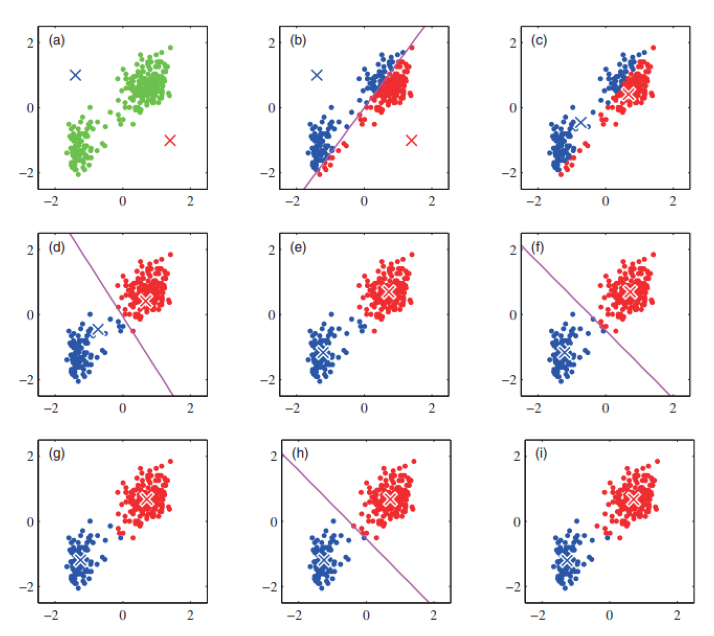

In [17]:
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
drive.mount('/content/drive')
img = mpimg.imread("/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/Clustering.png")
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off') # 축 제거
plt.show()

In [13]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df_iris.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- 군집화 과정에서 생성되는 군집 번호는 데이터 내에서 자동으로 탐지된 페턴이나 구조를 반영한 것이지, 실제 타겟 값을 반영하는 것은 아니다.

In [14]:
kmeans = KMeans(n_clusters=3, n_init='auto', max_iter=300, random_state=0).fit(df_iris)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [15]:
df_iris['cluster'] = kmeans.labels_
df_iris.head()

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [18]:
df_iris['target'] = iris.target
df_iris.head()

,sepal length,sepal width,petal length,petal width,cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [19]:
iris_result = df_iris.groupby(['target','cluster'])['sepal length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal length, dtype: int64


In [22]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(df_iris)

In [23]:
# 4개의 붓꽃데이터 속성은 2차원 평면상에 적합치 않아 PCA를 이용 4개의 속성을 2개 차원축소한 뒤에 X, Y좌표로 개별 데이터를 표현
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_scaled)
pca_transformed[:5]

array([[-2.51629137, -0.7520876 ],
       [-2.38376108,  0.06540438],
       [-2.61784584, -0.19072149],
       [-2.56708962, -0.00555279],
       [-2.61909633, -0.87868648]])

In [25]:
df_iris['pca_x'] = pca_transformed[:,0:]
df_iris['pca_y'] = pca_transformed[:,1:]
df_iris.head()

,sepal length,sepal width,petal length,petal width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.516291,-0.752088
1,4.9,3.0,1.4,0.2,1,0,-2.383761,0.065404
2,4.7,3.2,1.3,0.2,1,0,-2.617846,-0.190721
3,4.6,3.1,1.5,0.2,1,0,-2.567090,-0.005553
4,5.0,3.6,1.4,0.2,1,0,-2.619096,-0.878686


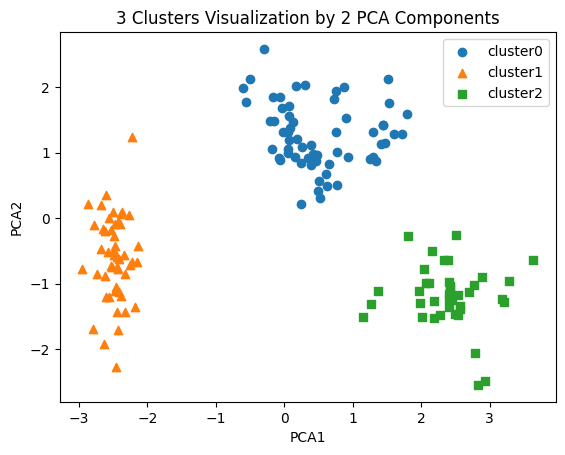

In [32]:
import matplotlib.pyplot as plt

# cluster 값이 0,1,2인 경우마다 별도의 index로 추출
mark0_idx = df_iris[df_iris['cluster']==0].index
mark1_idx = df_iris[df_iris['cluster']==1].index
mark2_idx = df_iris[df_iris['cluster']==2].index

plt.scatter(x=df_iris.loc[mark0_idx, 'pca_x'],
           y=df_iris.loc[mark0_idx, 'pca_y'],
           marker='o', label='cluster0')
plt.scatter(x=df_iris.loc[mark1_idx, 'pca_x'],
           y=df_iris.loc[mark1_idx, 'pca_y'],
           marker='^', label='cluster1')
plt.scatter(x=df_iris.loc[mark2_idx, 'pca_x'],
           y=df_iris.loc[mark2_idx, 'pca_y'],
           marker='s', label='cluster2')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.legend()
plt.show()

## 군집 평가
- 실루엣 분석으로 평가, 이를 위해 metrics 모듈의 silhouette_samples, silhouette_score을 이용

- 대부분의 군집화 데이터 세트는 타겟 레이블을 가지고 있지 않다.
- 비지도 학습의 특성상 정확하게 성능을 평가하기 어렵지만 군집화의 성능을 평가하는 방법으로 실루엣 분석 이용
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는 지를 나타냄.
- 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
- 실루엣 계수는 -1에서 1사이의 값을 가지며 1로 가까워질수록 근처의 군집과 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것임.
 - 실루엣 계수 : $s(i) = (b(i) - a(i))/max(a(i),b(i))$
   - $a(i)$ : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
   - $b(i)$ : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
   - \- 값은 아예 다른 군집에 테이터 포인트가 할당되었음을 의미
- silhouette_samples : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해 주면 각 데이터 포인트의 실루엣 계수를 반환
- silhouette_score : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해 주면 전체 데이터의 실루엣 계수 값을 평균해 반환. 즉 np.mean(silhouette_samples())과 같음. 이 값이 높을수록 군집화가 잘 됐다고 판단할 수 있지만 무조건 높다고 해서 군집화가 잘되었다고는 할 수 없다.
 - 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함

In [38]:
from re import S
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_name = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris = pd.DataFrame(data=iris.data, columns=feature_name)
kmeans = KMeans(n_clusters=3, n_init='auto', max_iter=300, random_state=0).fit(df_iris)
df_iris['cluster'] = kmeans.labels_

score_samples = silhouette_samples(iris.data, df_iris['cluster'])
print(score_samples.shape)

df_iris['silhouette_coeff'] = score_samples

average_score = silhouette_score(iris.data, df_iris['cluster'])

print(f'Silhouette Score:{average_score:.3f}')

df_iris.head()

(150,)
Silhouette Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797
3,4.6,3.1,1.5,0.2,1,0.804352
4,5.0,3.6,1.4,0.2,1,0.848918


In [39]:
df_iris['silhouette_coeff'].mean()

0.551191604619592

In [40]:
df_iris.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


In [42]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, n_init='auto', max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

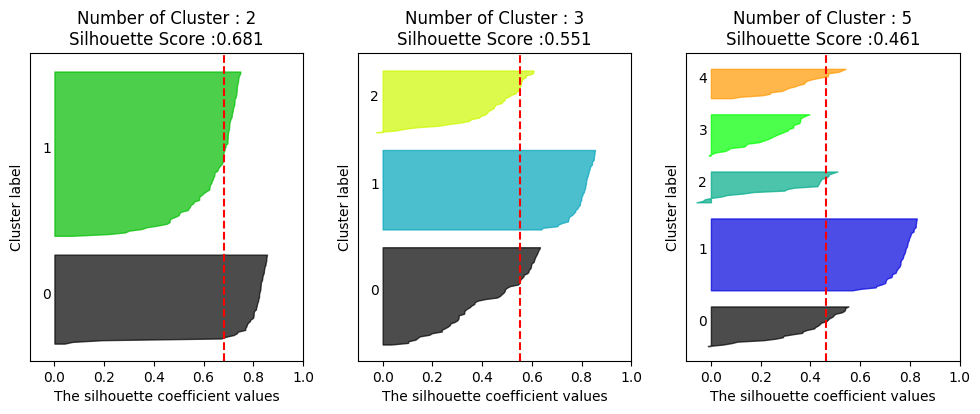

In [54]:
visualize_silhouette([2,3,5], iris.data)

실루엣 다이어그램을 해석할 때 주의해야 할 요소

1. 실루엣 계수의 값
  - 값의 범위: 실루엣 계수는 -1에서 1 사이의 값을 가진다. 1에 가까울수록 해당 데이터 포인트가 자신의 클러스터에 잘 속해 있으며, 다른 클러스터와는 멀리 떨어져 있다는 것을 의미. 0에 가까운 값은 클러스터 경계에 위치한 데이터 포인트를 의미하며, -1에 가까울수록 다른 클러스터에 할당되어야 할 데이터 포인트를 나타냄.
  - 평균 실루엣 스코어: 모든 데이터 포인트의 실루엣 스코어의 평균값이 높을수록 클러스터링 품질이 좋다고 할 수 있음.

2. 실루엣 다이어그램의 형태
  - 너비: 각 클러스터에 대한 실루엣 계수의 너비(가로축)는 클러스터 내의 데이터 포인트가 얼마나 그 클러스터에 잘 속해 있는지를 나타냄. 넓고 균일한 너비는 좋은 클러스터링을 의미.
  - 높이: 세로축은 클러스터에 속한 데이터 포인트의 수를 나타냄. 높이가 불균일하면, 일부 클러스터가 다른 것보다 훨씬 많거나 적은 수의 데이터 포인트를 가지고 있음을 의미.
  
3. 실루엣 다이어그램의 일관성
  - 일관된 너비와 높이: 모든 클러스터의 실루엣 계수가 1에 가깝고, 너비와 높이가 비교적 균일하다면, 이는 클러스터링이 잘 되었음을 의미.
  - 불균일한 너비 또는 음수 값: 일부 클러스터의 실루엣 계수가 매우 낮거나 음수 값을 가진다면, 이는 클러스터링 결과에 문제가 있을 수 있음을 나타냄. 이는 잘못된 클러스터 할당이나, 적절하지 않은 클러스터 수를 선택했을 가능성을 시사.
  - 실루엣 다이어그램을 통한 시각화는 클러스터링의 품질을 직관적으로 이해하는 데 도움을 줌. 좋은 클러스터링 결과를 얻기 위해, 실루엣 스코어를 기반으로 다양한 클러스터 수를 실험해 보고, 최적의 클러스터링 구조를 찾는 것이 중요.

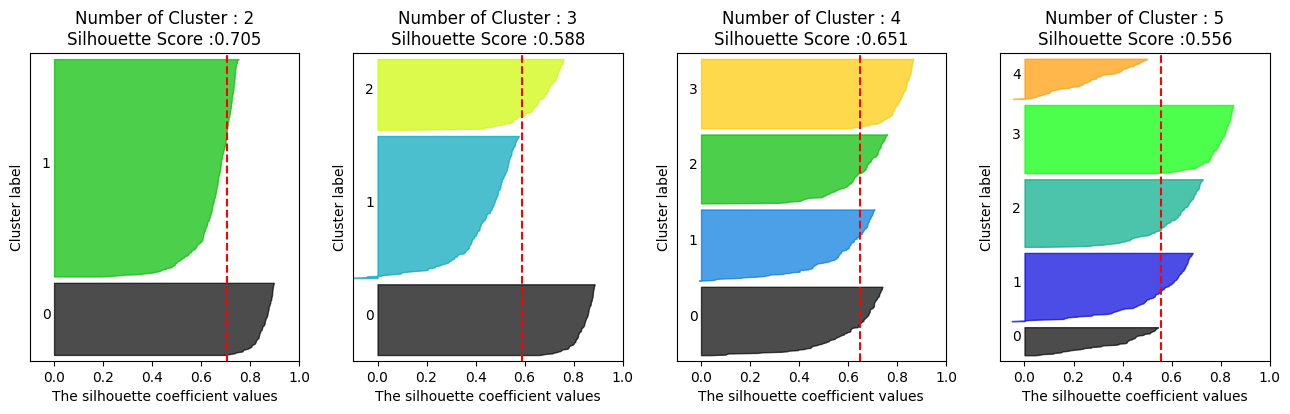

In [71]:
# make_blobs를 통해 clustering을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0,10.0),shuffle=True, random_state=1)

# cluster 개수를 2,3,4,5개일때의 클러스터별 실루엣 계수 평균값을 시각화
# 4개의 군집일 때 가장 최적
visualize_silhouette([2,3,4,5], X)

1. Cluster : 2
    - 0번 값이 높은 값을 가지나, 1번 너비가 너무 넓다.
    - 하지만 평균 값이 높음.

2. Cluster : 3
    - 0번값은 그대로인 값을 가짐, 1번 너비가 너무 넓고 음수값을 가짐
    - 클러스터 값이 2일때보다는 잘 나눠 졌지만, 오차 생겼을 것 같음.

3. Cluster : 4
    - 전체 적으로 균등한 너비를 가지며, 값도 어느정도 비슷해짐.
    - 잘 분류되었다고 생각.

4. Cluster : 5
    - 음의 값을 가지는 번호들이 늘었고, 4번에 비하면 균일도도 떨어짐.

- 전체적으로 Cluster 2, 4의 데이터를 보고 판단해야 될 것 같음
